In [1]:
import pandas as pd

from stable_baselines3.a2c import A2C
from workflow import TradeEnv

In [2]:
d = pd.read_csv("prices_and_features.csv", index_col=0, parse_dates=True)

In [3]:
train = d.iloc[:int(len(d) * .8)]
test = d.iloc[int(len(d) * .8):]

In [4]:
train_env = TradeEnv(train)

model = A2C("MlpPolicy", train_env, verbose=0)
model.learn(total_timesteps=len(train)*10, progress_bar=True)

Output()

In [12]:
# Assuming you have your test data in a variable named `test`
test_env = TradeEnv(test)
obs = test_env.reset()[0]

total_rewards = 0
done = False

while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, info = test_env.step(action)
    total_rewards += reward

# Now total_rewards contains the sum of rewards accrued over the test set
print(f"Total rewards on test set: {total_rewards}")

Total rewards on test set: 1093792.410907073


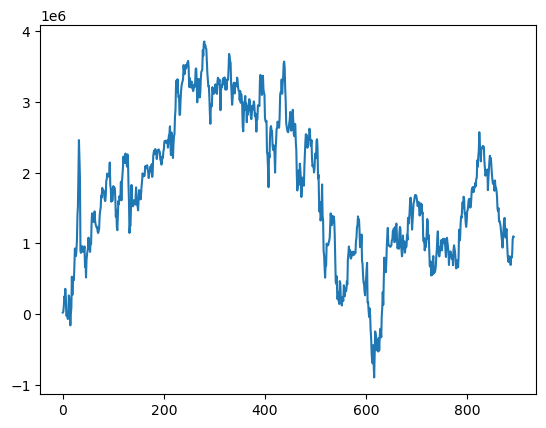

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(test_env.rewards))

In [5]:
model.learn

<bound method A2C.learn of <stable_baselines3.a2c.a2c.A2C object at 0x000002C817C84490>>